In [1]:
import xgboost as xgb
import pandas as pd
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [10]:
# x_train = pd.read_csv('../processed_data/pre_x_train.csv')
# x_test = pd.read_csv('../processed_data/pre_x_test.csv')
x_train = pd.read_csv('../processed_data/new_train_added_12_all.csv')
x_test = pd.read_csv('../processed_data/new_test_added_12_all.csv')
y_train = pd.read_csv('../processed_data/y_train.csv')
x_test_id = pd.read_csv('../raw_data/test.csv',usecols=['ID'])

In [11]:
params = {
    'eta': 0.02,
    'max_depth': 3,
    'subsample': 0.93,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': 100.0, # base prediction = mean(target)
    'silent': 1
}
d_train = xgb.DMatrix(x_train,y_train)
watchlist = [(d_train, 'train')]

d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = 0.02
params['max_depth'] = 3
params['base_score'] = y_train['y'].mean()
d_train = xgb.DMatrix(x_train,y_train)
watchlist = [(d_train, 'train')]

d_test = xgb.DMatrix(x_test)

In [14]:
bst = xgb.train(params, d_train ,450, watchlist,early_stopping_rounds=50, verbose_eval=10)

[0]	train-rmse:12.5508
Will train until train-rmse hasn't improved in 50 rounds.
[10]	train-rmse:11.3072
[20]	train-rmse:10.3868
[30]	train-rmse:9.71751
[40]	train-rmse:9.24025
[50]	train-rmse:8.89676
[60]	train-rmse:8.65152
[70]	train-rmse:8.47696
[80]	train-rmse:8.34789
[90]	train-rmse:8.24868
[100]	train-rmse:8.1724
[110]	train-rmse:8.09878
[120]	train-rmse:8.04358
[130]	train-rmse:7.98166
[140]	train-rmse:7.93032
[150]	train-rmse:7.88832
[160]	train-rmse:7.85052
[170]	train-rmse:7.81619
[180]	train-rmse:7.77081
[190]	train-rmse:7.73463
[200]	train-rmse:7.70701
[210]	train-rmse:7.67641
[220]	train-rmse:7.65063
[230]	train-rmse:7.61267
[240]	train-rmse:7.58979
[250]	train-rmse:7.56719
[260]	train-rmse:7.54746
[270]	train-rmse:7.52176
[280]	train-rmse:7.50462
[290]	train-rmse:7.4855
[300]	train-rmse:7.46628
[310]	train-rmse:7.45327
[320]	train-rmse:7.42455
[330]	train-rmse:7.39677
[340]	train-rmse:7.37828
[350]	train-rmse:7.36241
[360]	train-rmse:7.33955
[370]	train-rmse:7.32605
[380]

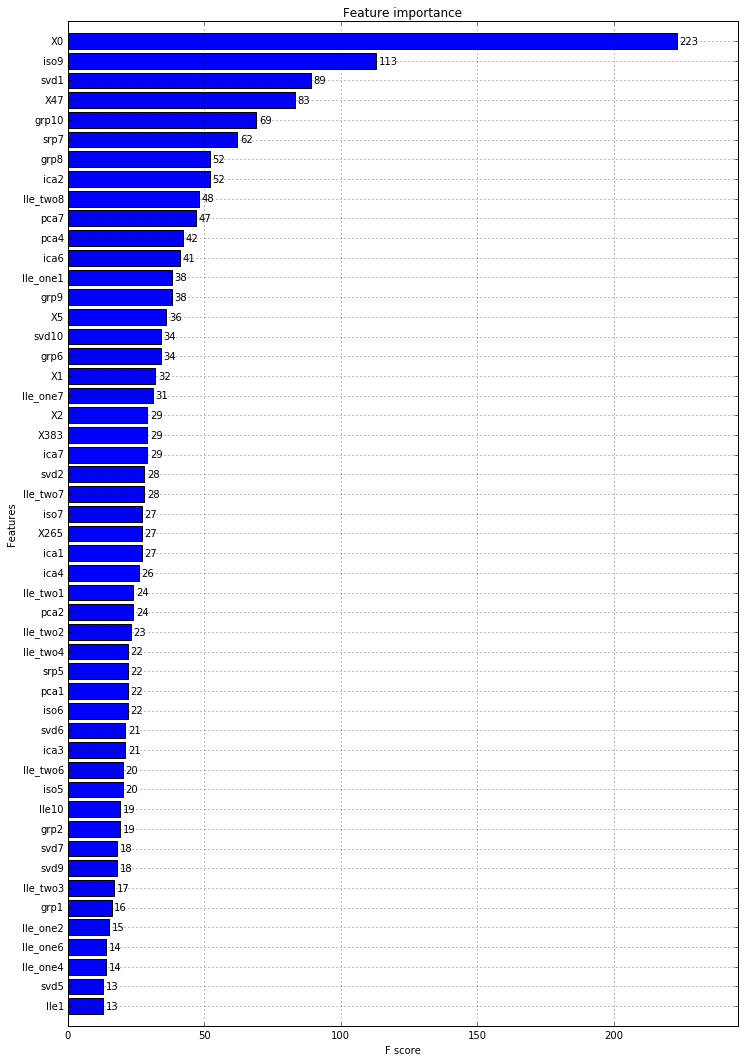

In [16]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(bst, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [15]:
y_test = bst.predict(d_test)
sub = pd.DataFrame()
sub['ID'] = x_test_id['ID']
sub['y'] = y_test
sub.to_csv('../output/final2.csv', index=False)